**Brian Blaylock**  
**May 1, 2019**

# Show the "Bahama Bar" proximity to the HRRR domain

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import multiprocessing
import os

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/')
from BB_HRRR.HRRR_Pando import get_hrrr_variable, get_hrrr_latlon
from BB_HRRR.HRRR_paths import get_domains
from BB_GOES.get_GOES import get_GOES_nearesttime
from BB_GOES.get_GLM import get_GLM_file_nearesttime, accumulate_GLM_FAST, filter_by_HRRR
from BB_datetimes.range import range_dates
from BB_maps.my_basemap import draw_centermap, draw_HRRR_map
from BB_maps.my_cartopy import proj_HRRR, extent_HRRR, pc
from BB_cmap.reflectivity_cmap import reflect_ncdc

#from BB_HRRR.GLM_and_HRRR.GLM_events_HRRR import get_GLM_HRRR_contingency_stats

from fires_list import get_fire

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8, 8]
mpl.rcParams['figure.titlesize'] = 12
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['lines.linewidth'] = 1.25
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.03
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
    
mpl.rcParams['savefig.dpi'] = 600    # 600 for print

In [2]:
m = draw_HRRR_map()

loaded /uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_maps/saved_map_objects/HRRR_lcc_i_2000.npy map from file


In [3]:
domains = get_domains()

HRRR Area in meters squared: 16811840278558.668
West Area in meters squared: 4034896806752.7593
Central Area in meters squared: 4034896806752.766
East Area in meters squared: 4034896806752.762


In [33]:
D1 = datetime(2019, 3, 28, 17, 30)
D2 = datetime(2018, 9, 11, 16, 30)

F1 = get_GOES_nearesttime(DATE=D1, product='GLM', window=120)
GLM1 = accumulate_GLM_FAST(F1['Files'], verbose=False)

F2 = get_GOES_nearesttime(DATE=D2, product='GLM', window=120)
GLM2 = accumulate_GLM_FAST(F2['Files'], data_type='event', verbose=False)

Requested 2019-03-28 17:30:00	satellite: GOES-16	Product: GLM
Looking here: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20190328/15/
Looking here: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20190328/16/
Looking here: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20190328/17/
Looking here: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20190328/18/
Looking here: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20190328/19/
---------------------------------------------------
 Window == +/- 120 Minutes
    first observation: 2019-03-28 15:30:00
     last observation: 2019-03-28 19:30:00
  Returning data from 720 GLM files (expected 720)
---------------------------------------------------
-->> Accumulate GLM FAST MP: 80.0%Requested 2018-09-11 16:30:00	satellite: GOES-16	Product: GLM
Looking here: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20180

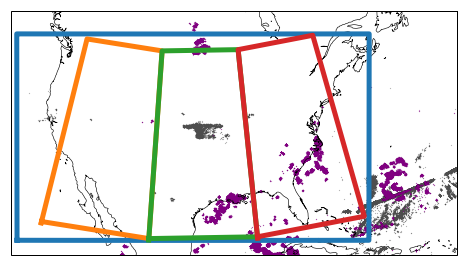

In [34]:
fig = plt.figure(figsize=(8,8))

cH = proj_HRRR()

ax1 = fig.add_subplot(1,1,1, projection=cH)


ax1.coastlines(resolution='50m', color='black', linewidth=.6)

for DOM in domains:
    lons = domains[DOM]['path'].vertices[:,0]
    lats = domains[DOM]['path'].vertices[:,1]

    ax1.plot(lons, lats, linewidth=5, transform=pc)
    
ax1.set_extent([-123, -60, 19, 51])

ax1.scatter(GLM1['longitude'], GLM1['latitude'], marker='.', s=.1,
            transform=pc, color=[.3,.3,.3])
ax1.scatter(GLM2['longitude'], GLM2['latitude'], marker='.', s=.1,
            transform=pc, color='purple')

plt.savefig('./figs/not_shown_GLM_Bahamas_bar', bbox_inches='tight', dpi=300)